# Introduction

Powerlifting, a sport that tests the maximum strength of an individual in three lifts—squat, bench press, and deadlift—has gained significant popularity. My interest in workout also led me to analyze a comprehensive dataset from OpenPowerlifting, featuring over 3 million entries on lifters' performances.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading data 

- The dataset utilized in this analysis has been sourced from OpenPowerlifting, which can refer to the [documentation](https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html).

In [3]:
# https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database/data
# https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html

data = pd.read_csv('./data/openpowerlifting-2024-01-06-4c732975.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043013 entries, 0 to 3043012
Data columns (total 41 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Name              object 
 1   Sex               object 
 2   Event             object 
 3   Equipment         object 
 4   Age               float64
 5   AgeClass          object 
 6   BirthYearClass    object 
 7   Division          object 
 8   BodyweightKg      float64
 9   WeightClassKg     object 
 10  Squat1Kg          float64
 11  Squat2Kg          float64
 12  Squat3Kg          float64
 13  Squat4Kg          float64
 14  Best3SquatKg      float64
 15  Bench1Kg          float64
 16  Bench2Kg          float64
 17  Bench3Kg          float64
 18  Bench4Kg          float64
 19  Best3BenchKg      float64
 20  Deadlift1Kg       float64
 21  Deadlift2Kg       float64
 22  Deadlift3Kg       float64
 23  Deadlift4Kg       float64
 24  Best3DeadliftKg   float64
 25  TotalKg           float64
 26  Place         

In [4]:
data_copy = data.copy()

In [5]:
df_clean = data.dropna()
df_clean.iloc[0]

Name                Laura Cullen
Sex                            F
Event                        SBD
Equipment                    Raw
Age                         38.0
AgeClass                   35-39
BirthYearClass             24-39
Division                  S35-39
BodyweightKg                81.9
WeightClassKg               82.5
Squat1Kg                   105.0
Squat2Kg                   112.5
Squat3Kg                   117.5
Squat4Kg                   118.0
Best3SquatKg               117.5
Bench1Kg                    55.0
Bench2Kg                    57.5
Bench3Kg                    60.0
Bench4Kg                    62.5
Best3BenchKg                60.0
Deadlift1Kg                130.0
Deadlift2Kg                137.5
Deadlift3Kg                142.5
Deadlift4Kg                147.5
Best3DeadliftKg            142.5
TotalKg                    320.0
Place                          1
Dots                      298.06
Wilks                      289.1
Glossbrenner              253.17
Goodlift  

# Checking Data

- Upon loading the data, we utilized the info() method, revealing a total of 3,043,013 records spanning across 41 attributes.

- To gain initial insights, we inspected a single complete record. This approach often unveils nuances that might be missed when employing methods such as head(), tail(), or sample(), which may contain null or missing data.

- As suggested by the documentation for the age-related information, we will prioritize the 'AgeClass' attribute to extract meaningful insights from this aspect of the dataset.

- Regarding the meet statistics, we chose 'TotalKg' as our primary metric. Computed as the sum of 'Best3SquatKg', 'Best3BenchKg', and 'Best3DeadliftKg'.

- In analyzing coefficients, 'Wilks' is widely recognized as the formula for assessing powerlifting performance. Wilks score, calculated from TotalKg, is normalized across both body weight (BodyweightKg) and gender (Sex).

- For instance, in the above record, a female athlete achieved a Wilks score of 289.1. If a male lifter of identical body weight were to lift the same amount, his Wilks score would be 215.32, respectively.

- For the scope of this analysis, meet-specific information will be excluded from consideration.

In [6]:
cols = ['Name', 'Sex', 'Equipment', 'AgeClass', \
        'BodyweightKg', 'TotalKg', 'Wilks' , 'Date']
df = data.loc[:, cols]
df[['Sex', 'Equipment', 'AgeClass']] = df[['Sex', 'Equipment', 'AgeClass']].astype("category")
df[['Date']] = df[['Date']].astype("datetime64[ns]")
df.info()
# selected the columns that we are interested in, 
# as well as changing the dtypes to reduce the memory usage. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043013 entries, 0 to 3043012
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Name          object        
 1   Sex           category      
 2   Equipment     category      
 3   AgeClass      category      
 4   BodyweightKg  float64       
 5   TotalKg       float64       
 6   Wilks         float64       
 7   Date          datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(3), object(1)
memory usage: 124.8+ MB


# Tidy Data

We assessed the extent of missing data and determined that the dataset remains substantial even after removal.
Utilizing the describe() method, we examined statistical summaries for each column.

Notable findings:

- After trimming, there are still more than 2 millions data.
- Some elite lifters have achieved remarkable records multiple times.
- Male participants dominate roughly three-quarters of the meets.
- More than half of the meets involve lifting without equipment. We can add a boolean column to address this.
- The dataset comprises 16 age classes, with '24-34' being the largest category.
- Focusing on recent years appears feasible.
- We will visualize numeric data to provide further insights.

In [7]:
nan_cnt = df.isna().sum().sum()
print('the total count of missing data:', nan_cnt)

the total count of missing data: 1282442


In [8]:
df = df.dropna()
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Name,2088712,510235,Magomedamin Israpilov,409,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,2088712,3,M,1548032,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Equipment,2088712,6,Raw,1160357,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeClass,2088712,16,24-34,598336,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BodyweightKg,2088712.0,NaN,NaN,NaN,NaT,NaT,84.384043,22.599168,10.0,67.35,82.0,98.66,300.0
TotalKg,2088712.0,NaN,NaN,NaN,NaT,NaT,373.064087,212.916522,1.0,187.5,342.5,540.0,1407.5
Wilks,2088712.0,NaN,NaN,NaN,NaT,NaT,270.664065,135.481679,0.67,128.87,296.645,376.78,793.33
Date,2088712,7970,2019-12-07 00:00:00,4803,1964-09-05,2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
sex_cnt = df.Sex.value_counts()
print('How many records for each sex:') 
print(sex_cnt)

How many records for each sex:
M     1548032
F      540621
Mx         59
Name: Sex, dtype: int64


In [10]:
df['Equipped'] = True
df.loc[df['Equipment'] == 'Raw', 'Equipped'] = False # Add a new column to distinquite if wearing equipemnt
equip_cnt = df['Equipped'].value_counts()
print('Wearing equipment or not:')
print(equip_cnt)

Wearing equipment or not:
False    1160357
True      928355
Name: Equipped, dtype: int64


Text(0.5, 1.0, 'Yearly Meet Count')

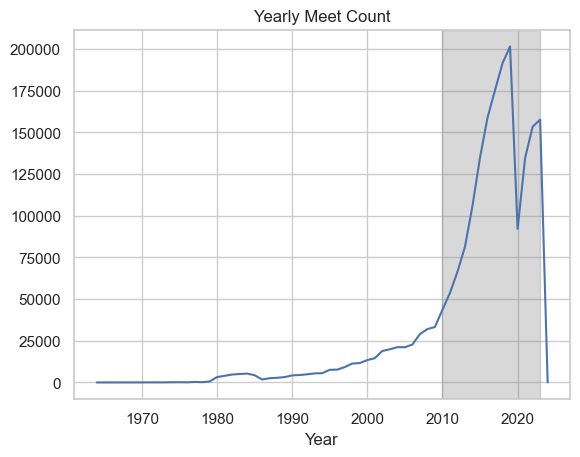

In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
sns.set(style="whitegrid")
sns.lineplot(df.groupby('Year').size())
plt.axvspan(2010, 2023, color='gray', alpha=0.3)
plt.title('Yearly Meet Count')

In [12]:
df = df.loc[(df.Year >= 2010) & (df.Year <= 2023)]
print('selecting records within 2010 to 2023, the data size remains:', df.size)

selecting records within 2010 to 2023, the data size remains: 17517430


# Data Analysis

### Box Plot Visualizations

We employed box plots to illustrate the distribution of 'BodyWeightKg', 'TotalKg', and 'Wilks' across different age classes.

Observations:

- The median body weight remains relatively stable post-junior age categories, despite numerous outliers across all age groups.
- The median total weight lifted peaks between ages 20 to 23, with the highest value recorded in the open class (ages 24 to 34), declining thereafter.
- Fewer outliers are evident in the Wilks plot compared to the other two, likely attributed to Wilks' normalization of body weight.

Next, we explore gender distribution using a pyramid bar chart.


In [13]:
custom_order = ['5-12', '13-15', '16-17', '18-19', '20-23', '24-34', '35-39', 
                '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', 
                '75-79', '80-999']
df['AgeClass'] = pd.Categorical(df['AgeClass'], categories=custom_order, ordered=True)

df.AgeClass.value_counts().sort_index(ascending=True)

5-12        8394
13-15      58693
16-17     163683
18-19     213573
20-23     291688
24-34     509505
35-39     131963
40-44     117163
45-49      81786
50-54      65022
55-59      42305
60-64      30544
65-69      17797
70-74      12041
75-79       5305
80-999      2281
Name: AgeClass, dtype: int64

Text(0.5, 1.0, 'Bodyweight via Age Class')

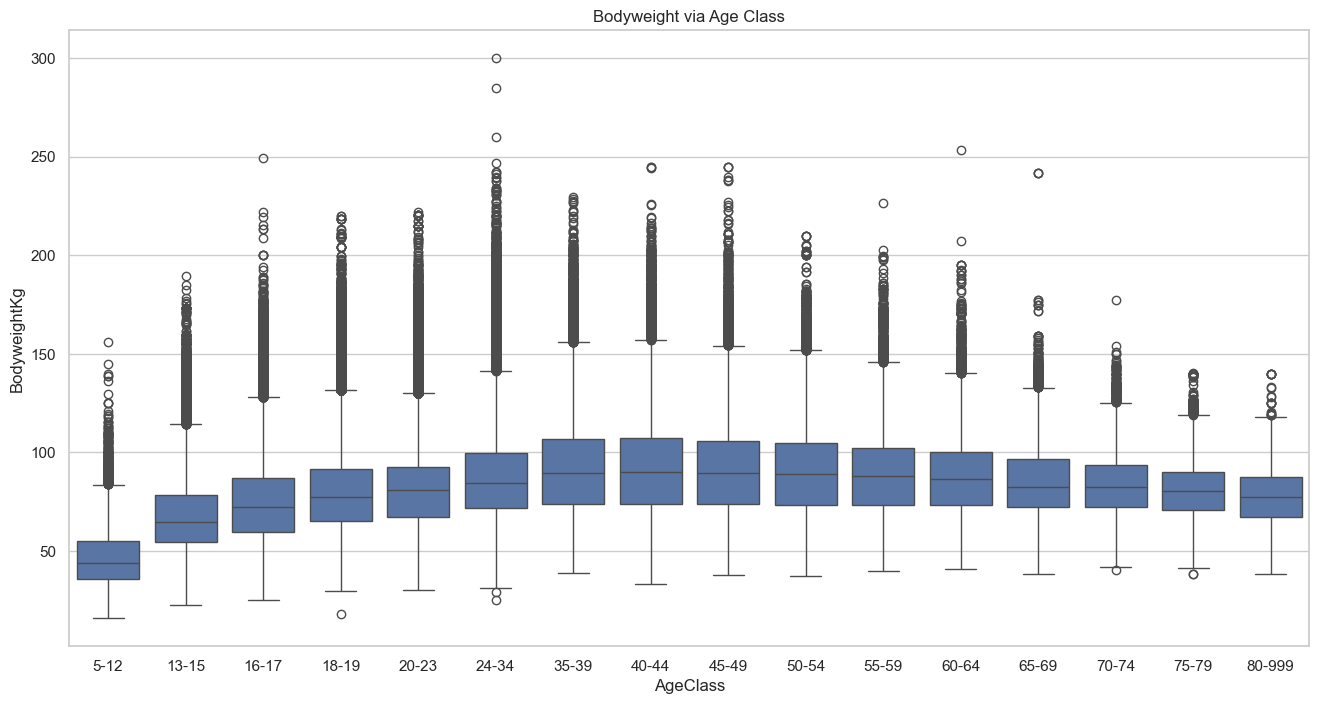

In [14]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='AgeClass', y='BodyweightKg', data=df)
plt.title('Bodyweight via Age Class')

Text(0.5, 1.0, 'Total Lifted via Age Class')

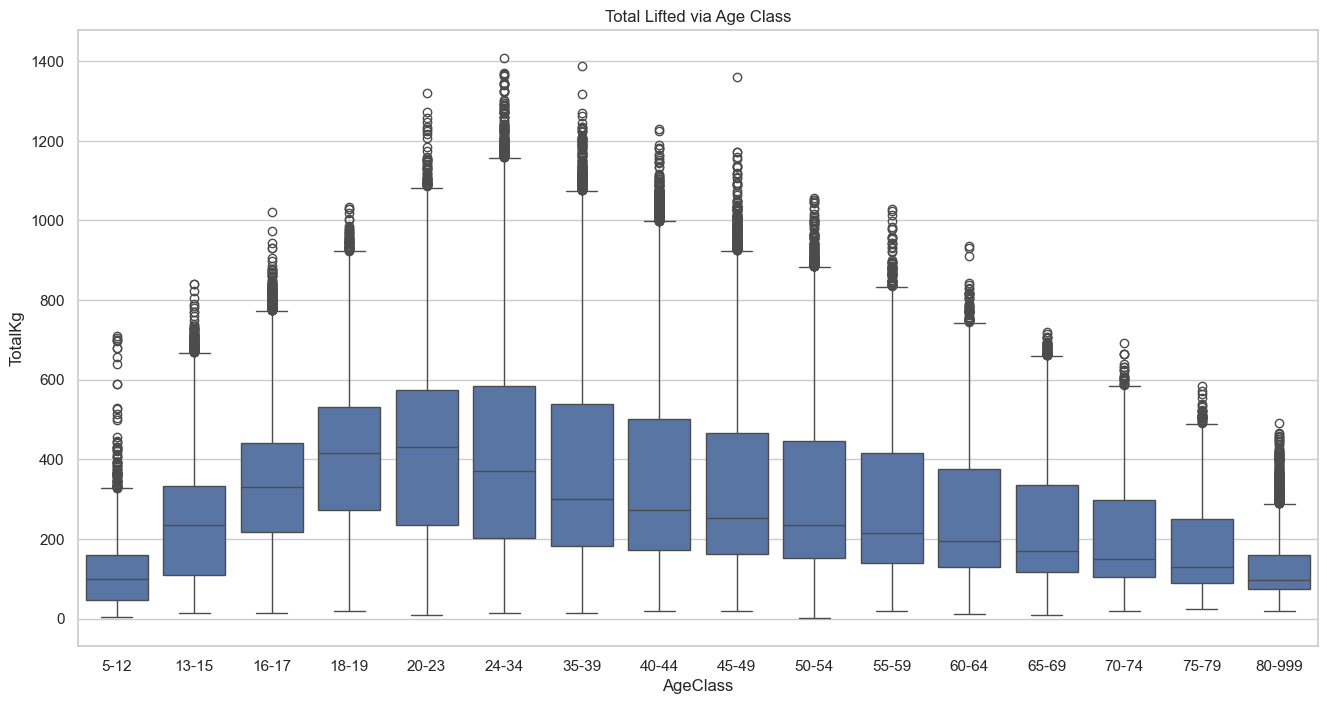

In [15]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='AgeClass', y='TotalKg', data=df)
plt.title('Total Lifted via Age Class')

Text(0.5, 1.0, 'Wilks via Age Class')

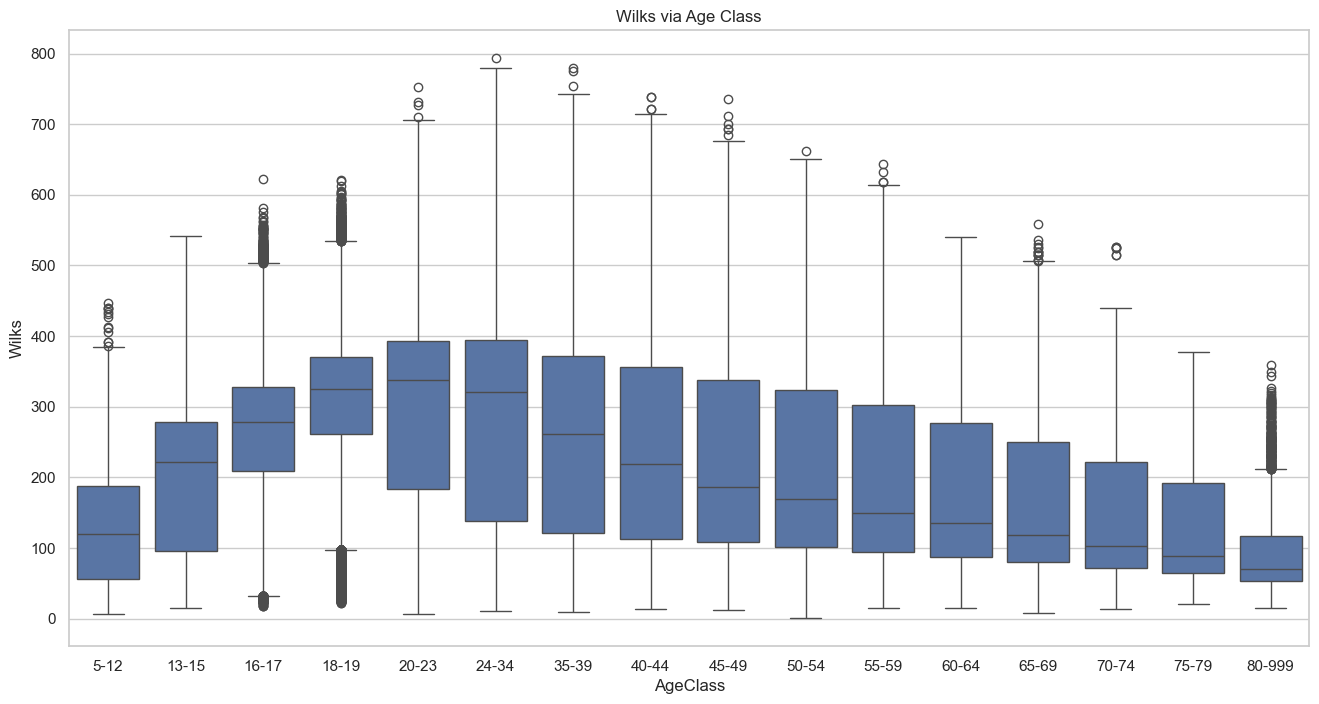

In [16]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='AgeClass', y='Wilks', data=df)
plt.title('Wilks via Age Class')

### Pyramid chart visualizations

AgeClass reminded us the population pyramid. It's basically a two-bar subplots in one chart, separately in different direction horizontally. It can help us to figure out the distribution of two factors, the population and the sex at the same time.

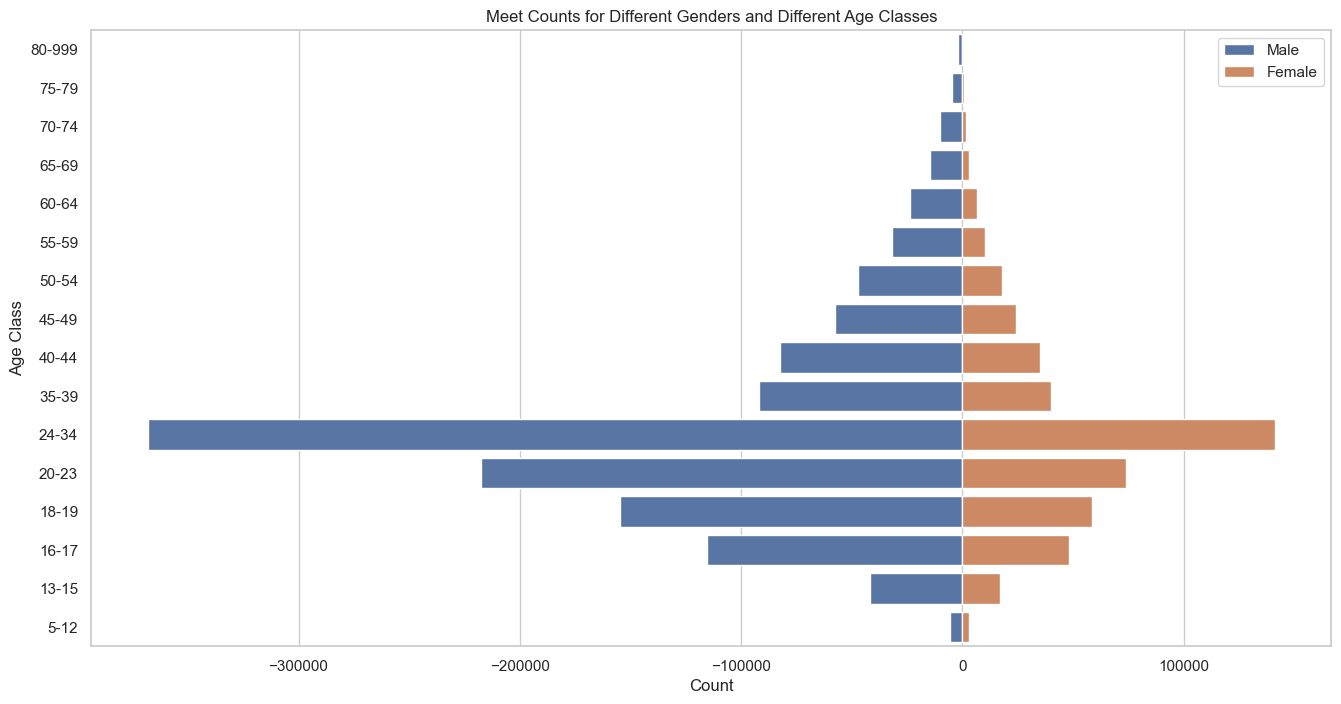

In [17]:
df['AgeClass'] = pd.Categorical(df['AgeClass'], categories=custom_order[::-1], ordered=True)

age_cnt = df.groupby('AgeClass')['Sex'].value_counts().unstack()

plt.figure(figsize=(16, 8))

sns.barplot(x=-age_cnt['M'], y=age_cnt.index, label='Male')
sns.barplot(x=age_cnt['F'], y=age_cnt.index, label='Female')
  
plt.xlabel('Count')
plt.ylabel('Age Class')
plt.title('Meet Counts for Different Genders and Different Age Classes')
plt.legend()

plt.show()

### Meet count

-  From the pyramid chart, we can easily find that the male lifters have more records.
- Keep in mind that the range of each AgeClass is different. While the 24-34 group has the most records, substantial meets are from the junior (18-23) classes.
- The records then dropped quickly after that.

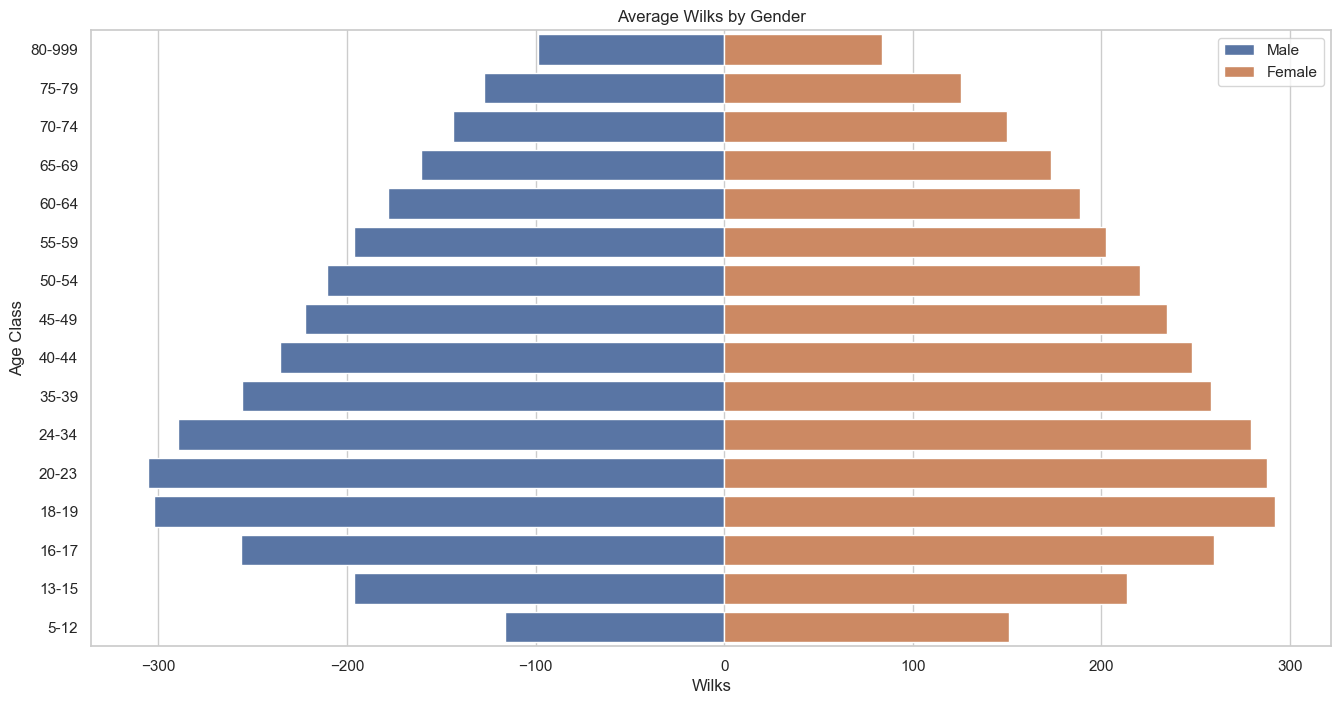

In [19]:
age_wilks = df.groupby(['AgeClass','Sex'])[['Wilks']].mean().unstack()

plt.figure(figsize=(16, 8))

sns.barplot(x=-age_wilks['Wilks']['M'], y=age_wilks.index, label='Male')
sns.barplot(x=age_wilks['Wilks']['F'], y=age_wilks.index, label='Female')
  
plt.xlabel('Wilks')
plt.ylabel('Age Class')
plt.title('Average Wilks by Gender')
plt.legend()

plt.show()

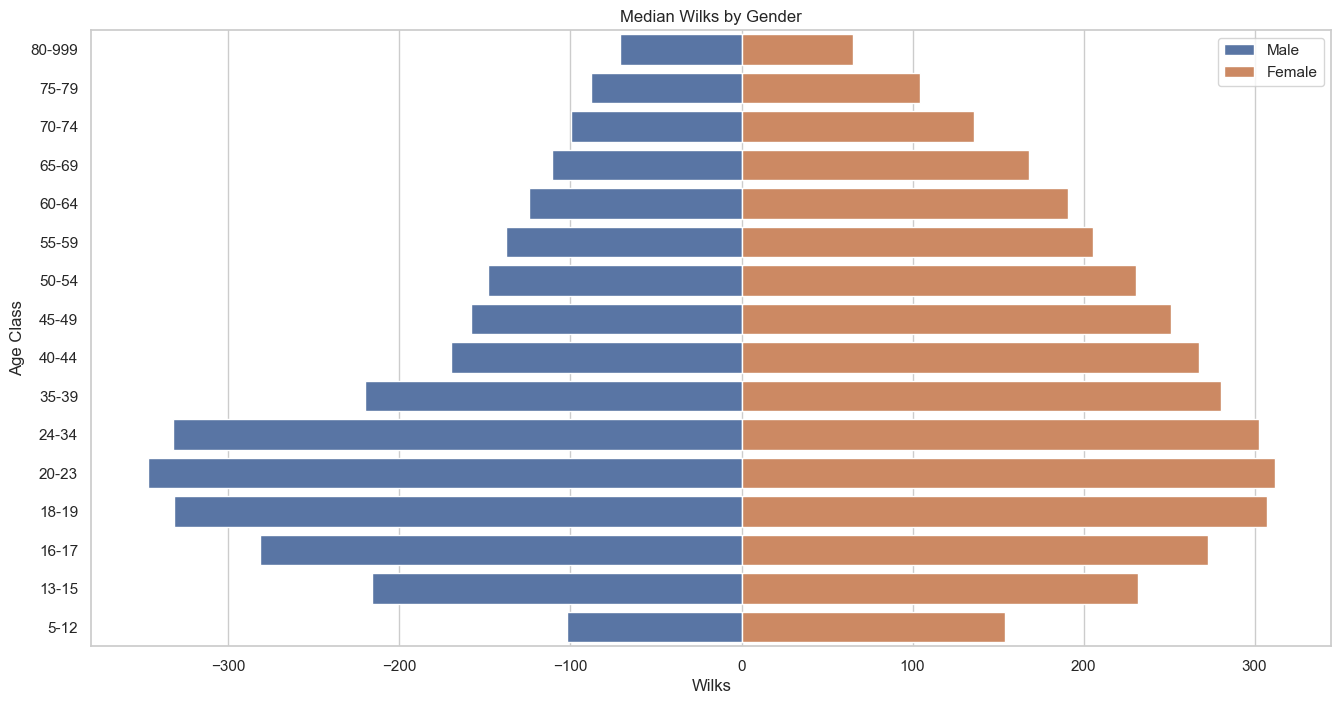

In [20]:
age_wilks2 = df.groupby(['AgeClass','Sex'])[['Wilks']].median().unstack()

plt.figure(figsize=(16, 8))

sns.barplot(x=-age_wilks2['Wilks']['M'], y=age_wilks2.index, label='Male')
sns.barplot(x=age_wilks2['Wilks']['F'], y=age_wilks2.index, label='Female')
  
plt.xlabel('Wilks')
plt.ylabel('Age Class')
plt.title('Median Wilks by Gender')
plt.legend()

plt.show()

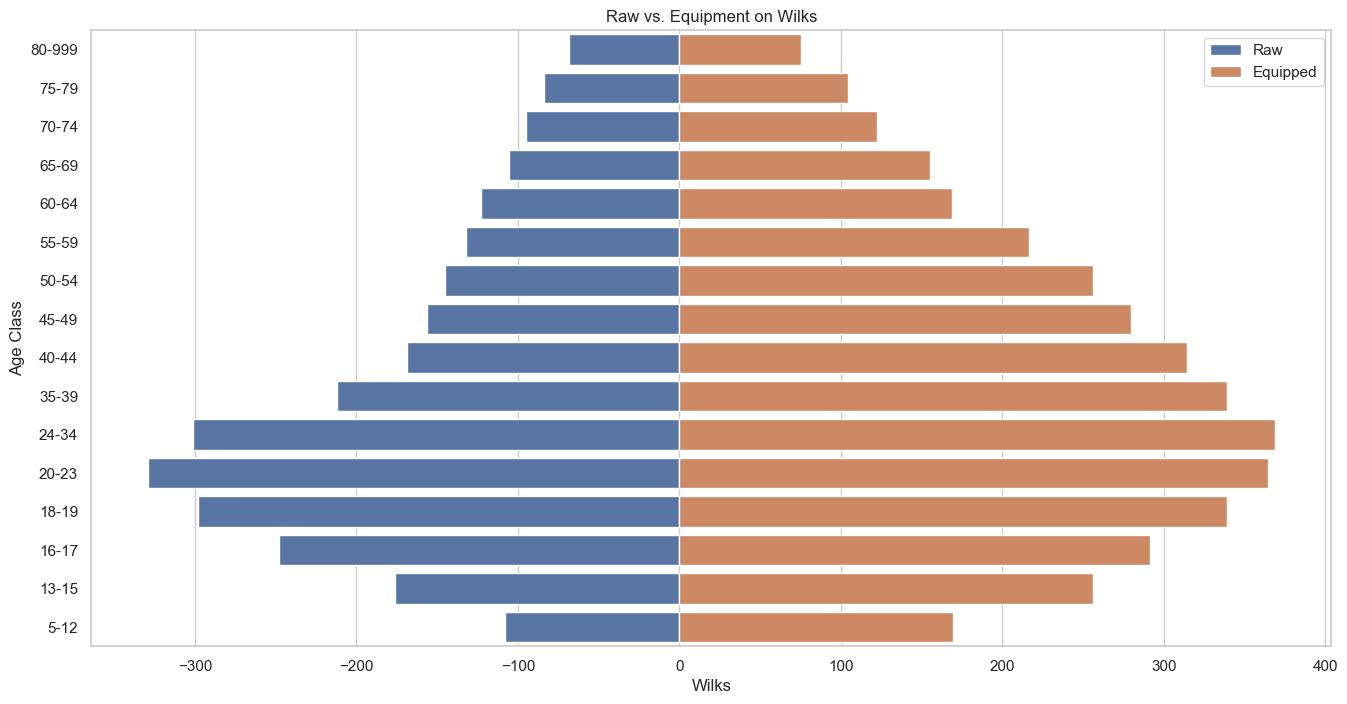

In [21]:
age_equip = df.groupby(['AgeClass', 'Equipped'])[['Wilks']].median().unstack()

plt.figure(figsize=(16, 8))

sns.barplot(x=-age_equip['Wilks'][False], y=age_equip.index,  label='Raw')
sns.barplot(x=age_equip['Wilks'][True], y=age_equip.index, label='Equipped')

plt.xlabel('Wilks')
plt.ylabel('Age Class')
plt.title('Raw vs. Equipment on Wilks')
plt.legend()

plt.show()

### Wilks score

- Unlike the meet count, the average Wilks is better balanced to male's and female's performance. 
- It's easily to get an impression from the pyramid chart for age-class and gender, though it's hard to judge one by one, for example, which score is higher in 45-49 class.
- If we check the median instead of the average value, the master classes (35+) for men drops down deeply. 
- The Wilks formula forcuses mainly on normalizing the body weight, and the age is not a factor. From the previous boxplots, the body weight distribution doesn't change much though ages, however the total weight lifted does, so does Wilks.
- How to explain the diffence between mean and median results? Some lifters can keep their body weight and still retain their performance though aging. Like [Elias Oziolor's research](https://oziolor.wordpress.com/2018/05/19/part-i-getting-old-you-can-still-lift/), "detraining" with age is mostly due to bodyweight loss.
- This scenario also found in the equipment chart. The influence of wearing equipment looks more important in the master classes.  

# Summary 

In this study, we discussed about:

- Reviewed documentation and statistical summaries for data preparation from cleaning missing values, converting data types appropriately, to selecting desired columns.
- Visualized powerlifting performance using box plots and pyarmid bar charts, which help in effectively displaying multi-factorial data.
- Group comparisons with performance metrics (e.g., Wilks scores) across different groups (age classes, gender, equipment use) to identify trends and differences.